\begin{split}
\frac{\partial (\rho u \phi)}{\partial x} = \frac{\partial}{\partial x} \left( \Gamma \frac{\partial \phi}{\partial x} \right)
\end{split}

With Direchlet boundary conditions, $\phi(x=0)=\phi_0$ and $\phi(x=L)=\phi_L$

Exact analytical solution:
\begin{split}
\phi = \phi_0 + \frac{\exp(x Pe / L)-1}{\exp(Pe) - 1}(\phi_L - \phi_0)
\end{split}

Discretize the as follows, assuming grid points are equally spaced:
\begin{split}
\rho u \frac{\phi_{i+1} - \phi_{i-1}}{2\Delta x} = \Gamma \frac{\phi_{i+1} - 2\phi_i + \phi_{i-1}}{(\Delta x)^2}
\end{split}

Rearrange to form linear system $\mathbf{A} \vec{x}=\vec{b}$:

\begin{split}
\phi_{i+1} \left( \frac{\rho u}{2\Delta x} - \frac{\Gamma}{(\Delta x)^2} \right)
+ \phi_i \left( \frac{2 \Gamma}{(\Delta x)^2} \right)
+ \phi_{i-1} \left( - \frac{\rho u}{2\Delta x} - \frac{\Gamma}{(\Delta x)^2} \right)
= 0
\end{split}

In [90]:
import matplotlib.pyplot as plt
import numpy as np
import scipy

In [91]:
# oscillatory solution can be observed at coarse grids and high peclet number
L = 1.0
N = 31
dx = L / (N - 1)
print("dx:", dx)
rho = 1.0
u = 1.0
Gamma = 0.1
phi_0 = 0.0
phi_L = 1.0

Pe = rho * u * L / Gamma
print("Pe:", Pe)

dx: 0.03333333333333333
Pe: 10.0


In [92]:
grid_exact = np.linspace(0, 1, 101)
solution_exact = phi_0 + (np.exp(grid_exact * Pe / L) - 1) / (np.exp(Pe) - 1) * (phi_L - phi_0)

In [93]:
grid = np.linspace(0, 1, N)

In [94]:
# build system matrix [A]
A = np.zeros((N,N))

for i in range(1, N-1):
    A[i, i - 1] = - (rho * u) / (2 * dx) - Gamma / (dx**2)
    A[i, i] = 2 * Gamma / (dx**2)
    A[i, i + 1] = (rho * u) / (2 * dx) - Gamma / (dx**2)

A[0, 0] = 1
A[N-1, N-1] = 1

A

array([[   1.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.],
       [-105.,  180.,  -75.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.],
       [   0., -105.,  180.,  -75.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.],
       [   0.,    0., -105.,  180.,  -75.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.],


In [95]:
# build RHS vector [b]
b = np.zeros(N)

b[0] = phi_0
b[N-1] = phi_L

b

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [96]:
# solve for solution vector [x]
x = np.linalg.inv(A.T @ A) @ A.T @ b

x

array([-9.70214344e-13,  1.65286293e-05,  3.96687118e-05,  7.20648272e-05,
        1.17419389e-04,  1.80915775e-04,  2.69810716e-04,  3.94263633e-04,
        5.68497717e-04,  8.12425434e-04,  1.15392424e-03,  1.63202256e-03,
        2.30136022e-03,  3.23843294e-03,  4.55033475e-03,  6.38699728e-03,
        8.95832482e-03,  1.25581834e-02,  1.75979854e-02,  2.46537081e-02,
        3.45317200e-02,  4.83609366e-02,  6.77218399e-02,  9.48271045e-02,
        1.32774475e-01,  1.85900794e-01,  2.60277640e-01,  3.64405224e-01,
        5.10183842e-01,  7.14273908e-01,  1.00000000e+00])

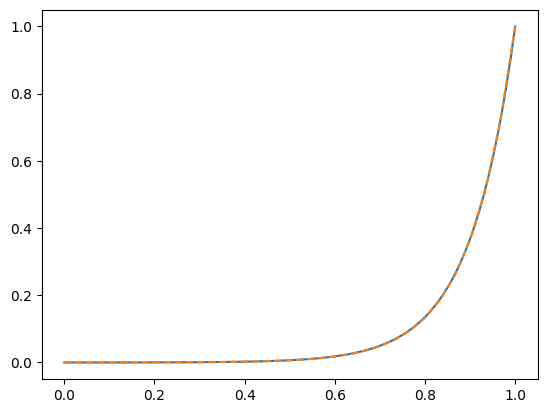

In [97]:
plt.plot(grid_exact, solution_exact)
plt.plot(grid, x, linestyle="--")